In [273]:
# !pip install ultralytics
# !pip uninstall opencv-python
from ultralytics import YOLO

In [367]:
import os
import supervision as sv
segments_folder = "segments_folder_10_seconds"

dataset_information = []

for video in os.listdir(segments_folder):
    path = os.path.join(segments_folder, video)
    size = os.path.getsize(path)
    try:
        vi = sv.VideoInfo.from_video_path(path)
        dataset_information.append({
            'width': vi.width, 'height':vi.width, 'fps':vi.fps, 'total_frames':vi.total_frames, 'path':path, 'size':size
        })
    except:
        print(f'Could not open {path}')
print(dataset_information[0])
print(len(dataset_information))


{'width': 640, 'height': 640, 'fps': 14, 'total_frames': 150, 'path': 'segments_folder_10_seconds\\stream_0_segment_000.mp4', 'size': 246059}
918


In [368]:
df = pd.DataFrame(dataset_information)
df.head(10)

,width,height,fps,total_frames,path,size
0,640,640,14,150,segments_folder_10_seconds\stream_0_segment_00...,246059
1,640,640,14,150,segments_folder_10_seconds\stream_1000_segment...,327640
2,640,640,14,150,segments_folder_10_seconds\stream_1001_segment...,318573
3,352,352,15,150,segments_folder_10_seconds\stream_1002_segment...,332297
4,640,640,14,150,segments_folder_10_seconds\stream_1004_segment...,319620
5,352,352,15,150,segments_folder_10_seconds\stream_1006_segment...,332724
6,352,352,15,150,segments_folder_10_seconds\stream_1007_segment...,333279
7,352,352,15,150,segments_folder_10_seconds\stream_1008_segment...,250737
8,352,352,15,151,segments_folder_10_seconds\stream_1010_segment...,203383
9,640,640,14,150,segments_folder_10_seconds\stream_1011_segment...,245363


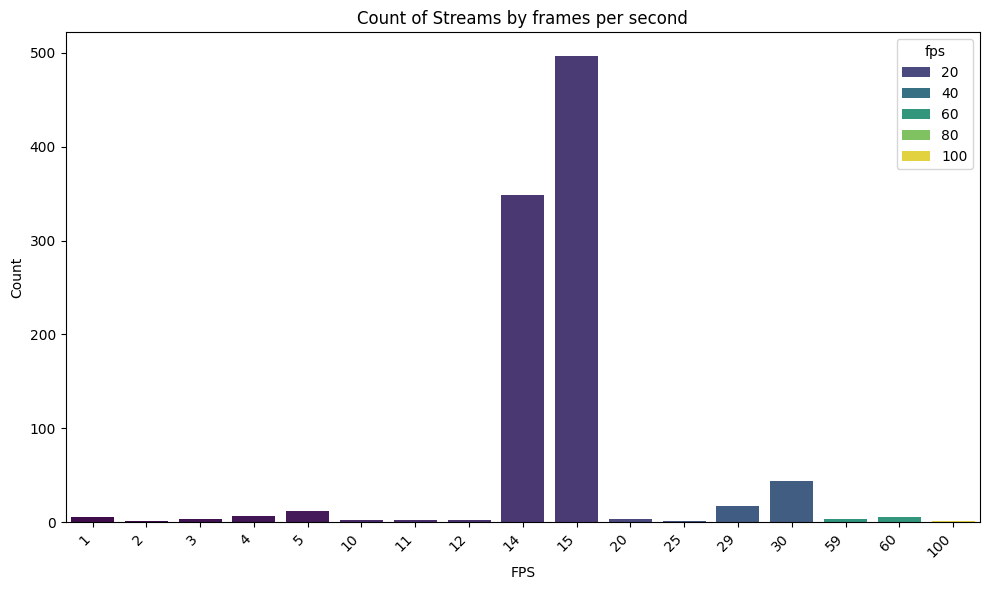

In [278]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each unique FPS value
fps_counts = df['fps'].value_counts().sort_index()

# Create a count plot using seaborn for FPS
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='fps', order=fps_counts.index, palette='viridis', hue='fps')

plt.xlabel('FPS')
plt.ylabel('Count')
plt.title('Count of Streams by frames per second')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

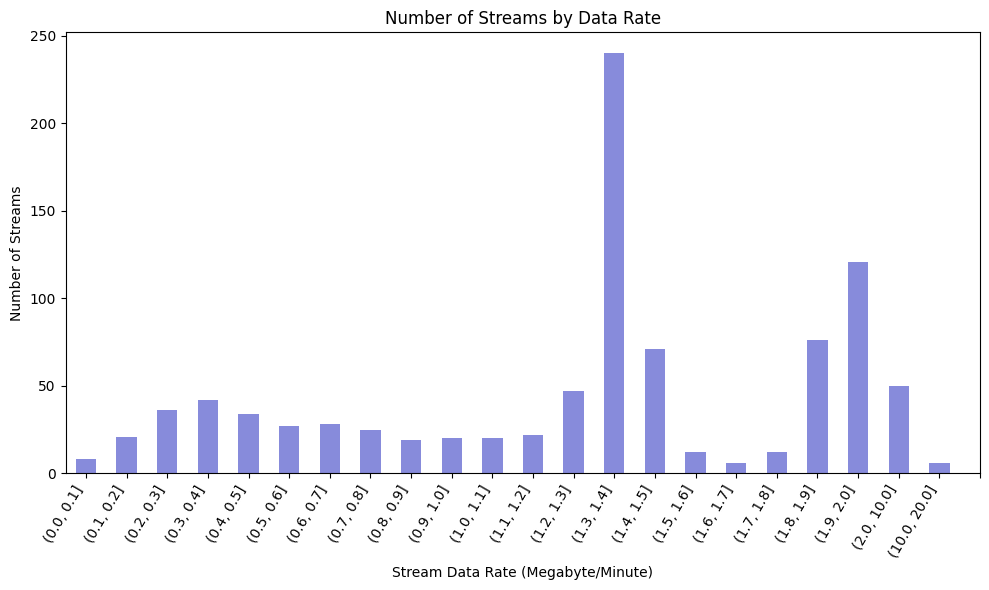

In [284]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a 'size' column

# Calculate size in megabytes
df['size_mb'] = df['size'] / (1024 ** 2)  # 1024 bytes = 1 kilobyte, 1024 kilobytes = 1 megabyte

# Create bins based on your specifications
bins = [i / 10 for i in range(21)] + [i for i in range(10, 30, 10)]

# Cut the data into these bins
df['bin'] = pd.cut(df['size_mb'], bins=bins)

# Count the number of videos in each bin
video_count_by_bin = df['bin'].value_counts().sort_index()

# Create a bar plot for video counts by bin
plt.figure(figsize=(10, 6))
ax = video_count_by_bin.plot(kind='bar', color='#878bdb')
ax.set_xticks(range(len(bins)))
plt.xlabel('Stream Data Rate (Megabyte/Minute)')
plt.ylabel('Number of Streams')
plt.title('Number of Streams by Data Rate')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


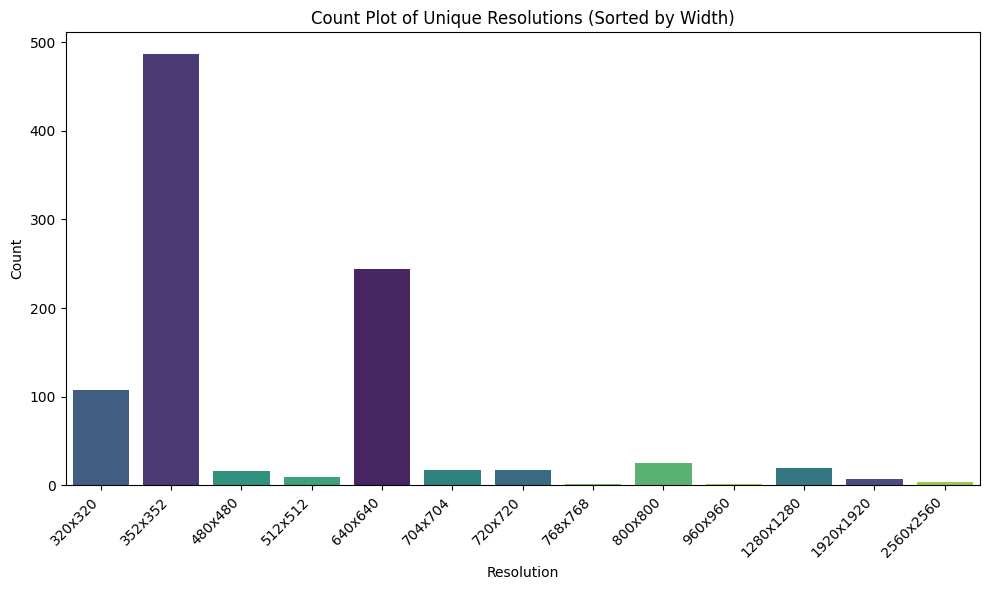

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the widths of each resolution
df['resolution_width'] = df['width'].astype(int)  # Convert width column to integer type
df['resolution'] = df['width'].astype(str) + 'x' + df['height'].astype(str)

resolution_widths = df.groupby('resolution')['resolution_width'].max().reset_index()

# Sort resolutions by width in descending order
sorted_resolutions = resolution_widths.sort_values(by='resolution_width', ascending=True)['resolution']

# Count the occurrences of each unique resolution using the sorted order
resolution_counts = df['resolution'].value_counts().loc[sorted_resolutions]

# Create a count plot using seaborn with sorted resolutions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='resolution', hue='resolution', order=sorted_resolutions, palette='viridis', legend=False)

plt.xlabel('Resolution')
plt.ylabel('Count')
plt.title('Count Plot of Unique Resolutions (Sorted by Width)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [289]:
# Calculate the total pixels per frame
df['total_pixels_per_frame'] = df['width'] * df['height']
# Calculate the total pixels per minute
df['total_pixels_per_minute'] = df['total_pixels_per_frame'] * df['fps'] * 60
# Calculate the megabytes per minute for each row
df['megabytes_per_minute'] = (df['size_mb'] / df['total_frames']) * df['fps'] * 60

# Calculate the total megabytes per minute for the entire system
total_gigabtyes_per_minute = df['megabytes_per_minute'].sum() / 1024
total_pixels_per_minute = df['total_pixels_per_minute'].sum()

print(f"Total Gigabytes per Minute for the System: {total_gigabtyes_per_minute:.3f}")
print(f"Total Terabytes per Day for the System: {(total_gigabtyes_per_minute * 60 * 24 / 1024):.3f}")
print(f"Total pixels per Day for the System: {(total_pixels_per_minute * 60 * 24 / 10**12):.3f} trillion")
# print(df.head())

Total Gigabytes per Minute for the System: 1.723
Total Terabytes per Day for the System: 2.423
Total pixels per Day for the System: 383.245 trillion


In [288]:
df.head()

,width,height,fps,total_frames,path,size,size_mb,bin,resolution_width,resolution,total_pixels_per_frame,total_pixels_per_minute,megabytes_per_minute
0,640,640,14,890,segments_folder\stream_0_segment_000.mp4,1445927,1.378943,"(1.3, 1.4]",640,640x640,409600,344064000,1.301475
1,640,640,14,900,segments_folder\stream_1000_segment_000.mp4,1931210,1.841745,"(1.8, 1.9]",640,640x640,409600,344064000,1.718962
2,640,640,14,900,segments_folder\stream_1001_segment_000.mp4,1930078,1.840666,"(1.8, 1.9]",640,640x640,409600,344064000,1.717955
3,352,352,15,899,segments_folder\stream_1002_segment_000.mp4,1986824,1.894783,"(1.8, 1.9]",352,352x352,123904,111513600,1.896891
4,640,640,14,900,segments_folder\stream_1004_segment_000.mp4,1942322,1.852343,"(1.8, 1.9]",640,640x640,409600,344064000,1.728853


In [283]:
# model = YOLO('yolov8s.pt')  # pretrained YOLOv8n model
# model.export(format='openvino') 
ov_model = YOLO('yolov8s_openvino_model/', task="detect")


Ultralytics YOLOv8.0.198  Python-3.11.5 torch-2.1.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

PyTorch: starting from 'yolov8s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (21.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success  3.2s, saved as 'yolov8s.onnx' (42.8 MB)

OpenVINO: starting export with openvino 2023.2.0-13089-cfd42bd2cb0-HEAD...
OpenVINO: export success  1.3s, saved as 'yolov8s_openvino_model\' (42.9 MB)

Export complete (8.5s)
Results saved to C:\Users\Julian\Documents\CE 290I\Final Project
Predict:         yolo predict task=detect model=yolov8s_openvino_model imgsz=640  
Validate:        yolo val task=detect model=yolov8s_openvino_model imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


In [375]:
results = ov_model.track('segments_folder\stream_0_segment_000.mp4', persist=True, save=True, project='/results')
print(results[0].speed)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/890) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder\stream_0_segment_000.mp4: 640x640 1 car, 99.3ms
video 1/1 (2/890) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder\stream_0_segment_000.mp4: 640x640 6 cars, 1 truck, 55.6ms
video 1/1 (3/890) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder\stream_0_segment_000.mp4: 640x640 7 cars, 1 truck, 30.3ms
video 1/1 (4/890) C:\Users\Julian\Documents\CE 2

{'preprocess': 15.581846237182617, 'inference': 99.33972358703613, 'postprocess': 9.003400802612305}


In [377]:
df2 = df.head()
print(df2.head())
def get_average_speed(results_dict):
    cum_speed = {'preprocess': 0.0, 'inference': 0.0, 'postprocess': 0.0}
    for result in results_dict:
        for stage in result.speed:
            cum_speed[stage] += result.speed[stage]
    for stage in cum_speed.keys():
        cum_speed[stage] = cum_speed[stage] / len(results_dict)
    return cum_speed
print(get_average_speed(results))

   width  height  fps  total_frames  \
0    640     640   14           150   
1    640     640   14           150   
2    640     640   14           150   
3    352     352   15           150   
4    640     640   14           150   

                                                path    size  
0  segments_folder_10_seconds\stream_0_segment_00...  246059  
1  segments_folder_10_seconds\stream_1000_segment...  327640  
2  segments_folder_10_seconds\stream_1001_segment...  318573  
3  segments_folder_10_seconds\stream_1002_segment...  332297  
4  segments_folder_10_seconds\stream_1004_segment...  319620  
{'preprocess': 11.921541074688514, 'inference': 36.35695998588305, 'postprocess': 8.883197655838527}


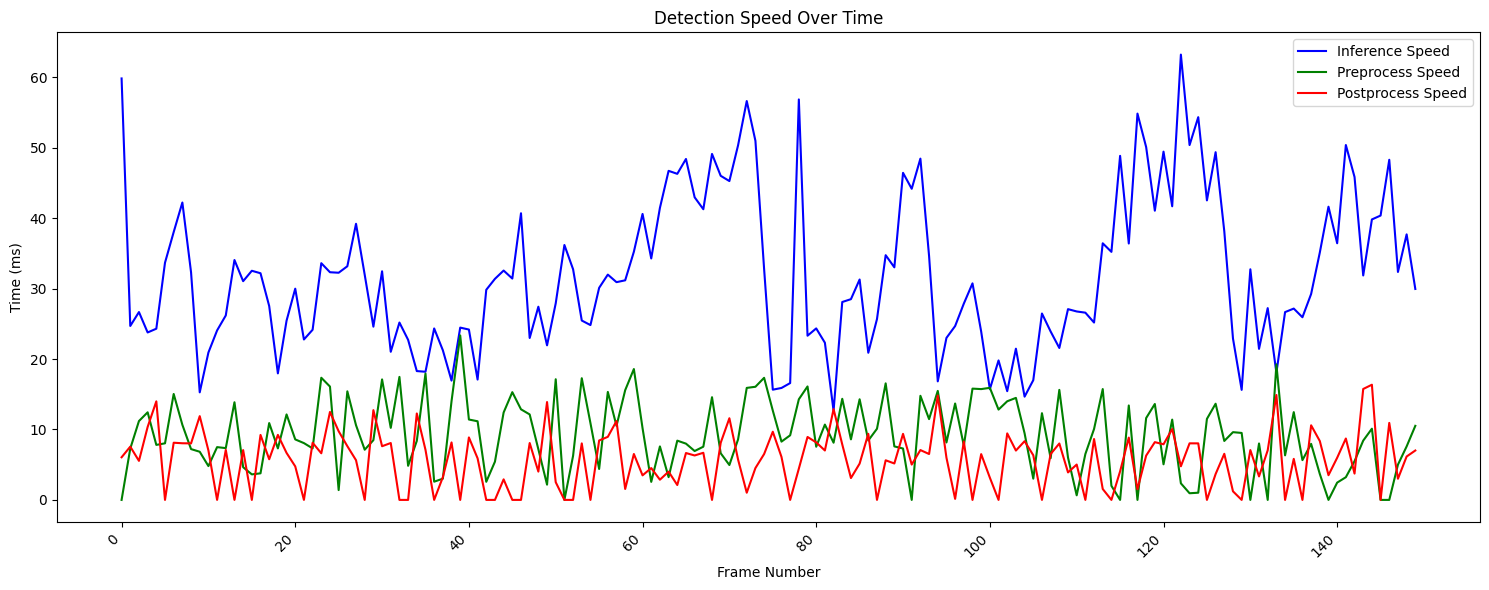

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a list of results objects and you want to plot their speeds
# Replace 'results' with your actual list of results

# Extract speeds from the results objects
preprocess_speeds = [result.speed['preprocess'] for result in results]
inference_speeds = [result.speed['inference'] for result in results]
postprocess_speeds = [result.speed['postprocess'] for result in results]

# Create a count plot of speeds with indices on the x-axis
plt.figure(figsize=(15, 6))  # Adjust the figure size for better visualization

# Plot the inference speeds in blue
sns.lineplot(x=range(len(inference_speeds)), y=inference_speeds, color='blue', label='Inference Speed')

# Plot the preprocess speeds in green
sns.lineplot(x=range(len(preprocess_speeds)), y=preprocess_speeds, color='green', label='Preprocess Speed')

# Plot the postprocess speeds in red
sns.lineplot(x=range(len(postprocess_speeds)), y=postprocess_speeds, color='red', label='Postprocess Speed')

plt.xlabel('Frame Number')
plt.ylabel('Time (ms)')
plt.title('Detection Speed Over Time')
plt.legend()  # Show legend with labels for each line

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [272]:
import threading
from ultralytics import YOLO
import cv2


def inference_thread(video_file, model_path, thread_index):
    """
    Runs inference on a video file concurrently with the YOLOv8 model using threading.

    Args:
        video_file (str): The path to the video file.
        model_path (str): The path to the YOLOv8 model checkpoint.
        thread_index (int): An index to uniquely identify the thread, used for display purposes.
    """
    # Load a separate YOLO model instance for this thread
    model = YOLO(model_path)
    print(f"Thread {thread_index} starting")
    video = cv2.VideoCapture(video_file)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_file = f'output_thread_{thread_index}.mp4'
    fps = int(video.get(cv2.CAP_PROP_FPS))
    frame_size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    out = cv2.VideoWriter(output_file, fourcc, fps, frame_size)

    while True:
        ret, frame = video.read()  # Read video frames
        if not ret:
            break
        results = model.track(frame, persist=True, save=True, project='/results')
        tracked_frame = results[0].plot()
        out.write(tracked_frame)
    video.release()
    out.release()

def run_inference_concurrently(num_threads, video_files, model_paths):
    """
    Runs inference concurrently on multiple videos using multiple threads.

    Args:
        num_threads (int): Number of threads to run concurrently.
        video_files (list): List of paths to video files.
        model_paths (list): List of paths to YOLOv8 model checkpoints.
    """
    threads = []

    for i in range(num_threads):
        video_file = video_files[i]  # Get the video file path
        model_path = model_paths[i % len(model_paths)]  # Cycle through model paths

        # Create and start a new inference thread
        thread = threading.Thread(target=inference_thread, args=(video_file, model_path, i), daemon=True)
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

# Example usage:
num_threads = 8  # Specify the number of threads
video_files = [f'segments_folder\stream_{i}_segment_000.mp4' for i in range(0,num_threads)]
model_paths = ['yolov8n.pt', 'yolov8s_openvino_model/']  # Specify the YOLO model checkpoints
run_inference_concurrently(num_threads, video_files, model_paths)


WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.


Thread 1 starting
Thread 3 starting
Thread 5 starting
Thread 7 starting
Thread 6 starting
Thread 2 starting
Thread 0 starting
Thread 4 starting


Loading yolov8s_openvino_model for OpenVINO inference...
Loading yolov8s_openvino_model for OpenVINO inference...
Loading yolov8s_openvino_model for OpenVINO inference...
Loading yolov8s_openvino_model for OpenVINO inference...








0: 480x640 4 cars, 1 train, 1392.4ms
Speed: 4.9ms preprocess, 1392.4ms inference, 15.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to \results\predict873

0: 480x640 12 cars, 1 truck, 1368.6ms
Speed: 67.6ms preprocess, 1368.6ms inference, 16.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to \results\predict873
0: 480x640 9 cars, 1 traffic light, 1243.6ms
Speed: 56.7ms preprocess, 1243.6ms inference, 15.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to \results\predict873
0: 480x640 5 cars, 1089.9ms
Speed: 86.3ms preprocess, 1089.9ms inference, 34.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to \results\predict873



0: 480x640 3 cars, 1 train, 1081.2ms
Speed: 8.9ms preprocess,

In [372]:
for i in range(len(df2.path)):
    video = df2.loc[i]['path']
    # print(os.path.exists(video))
    results = ov_model.track(video, persist=True, save=True)
    average_speed = get_average_speed(results)
    for key in average_speed:
        df2.loc[i][key] = average_speed[key]



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 9 cars, 1 bus, 1 truck, 29.9ms


True


video 1/1 (2/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 4 cars, 1 bus, 117.8ms
video 1/1 (3/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 5 cars, 2 buss, 33.0ms
video 1/1 (4/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 4 cars, 28.6ms
video 1/1 (5/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 3 cars, 1 bus, 31.8ms
video 1/1 (6/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 4 cars, 1 bus, 34.6ms
video 1/1 (7/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_000.mp4: 640x640 5 cars, 1 bus, 31.9ms
video 1/1 (8/150) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder_10_seconds\stream_0_segment_0

True


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\video\src\lkpyramid.cpp:1394: error: (-215:Assertion failed) prevPyr[level * lvlStep1].size() == nextPyr[level * lvlStep2].size() in function 'cv::`anonymous-namespace'::SparsePyrLKOpticalFlowImpl::calc'


In [374]:
ov_model.track('segments_folder/stream_222_segment_000.mp4', persist=True, save=True, project='/results')
# os.path.exists(df2.loc[1]['path'])



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/900) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder\stream_222_segment_000.mp4: 640x640 22 cars, 6 trucks, 1 boat, 1 traffic light, 42.6ms
video 1/1 (2/900) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder\stream_222_segment_000.mp4: 640x640 1 car, 35.2ms
video 1/1 (3/900) C:\Users\Julian\Documents\CE 290I\Final Project\segments_folder\stream_222_segment_000.mp4: 640x640 1 car, 25.1ms
video 1/1 (4/900) C:\User

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

width                                                  352
height                                                 352
fps                                                     15
total_frames                                           900
path            segments_folder\stream_949_segment_000.mp4
size                                               1993398
Name: 900, dtype: object